In the AdaLiNe tutorial, we looked at an implementation of a general framework for neural nets that can be extended to create more complex behaviour than classifying flowers. In this tutorial I want to extend these models to deep neural networks using tensorflow.

We began by looking at the 3 main parts of a neural net:
1. The model
2. The optimiser
3. The loss function

let's look at each one in turn.

1. The model

If you remember, we defined the model as being some function that took the a single input datapoint as input and returned a prediction given the data in the datapoint, and its weights. The only other specification was that the model's output must be differentiable wrt the weights.

Any neural network can be expressed as a single function in this form, but it is much easier to thing of the network as being made from layers.

Let's define two types of layers:
1. A dense layer is the layer we saw in the Adaline Tutorial. Every input to the layer is connected by a weight to the output
2. An activation layer applies a specific function to the values in each layer. We left this as `activation(x) = x` (so nothing) in the AdaLiNe tutorial, but we will use them today. Activations are often used to compress values into a specific range, but also have oher useful properties. It is worth rememebering that activation layers do not have any weights and we do not *learn* anything for them

We can then express a model with layers like below:
```
model(x, w) = activation(dense(activation(dense(x, w1)), w2))
```
The inner dense layer has multiple outputs to provide a vector input to the outer one.

Below is a diagram of what that might look like:

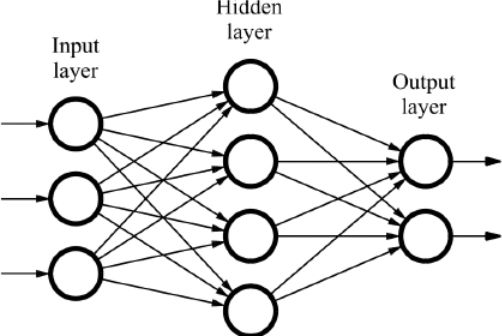

In the above diagram, the activation layers have been left out, and individual weights are represented as lines. The output of the inner dense layer is referred to as a "hidden" layer.

Because having multiple dense layers is like stacking adaline ontop of itself, we are able to model interactions between inputs rather than each one being independant

2. The optimiser

Once we have differentiated the cost wrt each weights (using the chain rule in backproporgation for non-output layer weights), we can use our optimiser to improve them. Using Stochastic Gradient Descent, we can reduce loss in the same way as in Adaline, but it is usually better to use a different optimiser (such as momentum, which we touched on in the gradient descent tutoral)

3. The loss functon

The loss function is what measures how close our predictions are to the correct outpurs. In theory different loss functions measure slightly different things, but in practice, it is not as important as (1) and (2). Some loss functions are better for specific applications, but we'll just use MSE as we've seen it before.

This framework is generalised in tensorflow, which abstracts away all the differentiation and low level model making to let us focus on the high level use of our neural network. A lot of people would say this is cheating, but, so long as you know *how* the inner workings of the ML work, there is no need to write them all out every time. Instead tensorflow focusses on the architecture of the models, which can be different for very project.

There are many types of layers in tensorflow, but we'll be focussing on dense ones in this tutorial.

In [60]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def display(images, number, rows):
  fig, axs = plt.subplots(rows, number//rows, figsize=(20, 4))
  axs = axs.reshape(rows, number//rows)
  for i in range(rows):
    for j in range(number//rows):
      axs[i, j].imshow(images[i*(number//rows) + j].reshape(28, 28), cmap="gray")
      axs[i, j].get_xaxis().set_visible(False)
      axs[i, j].get_yaxis().set_visible(False)

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


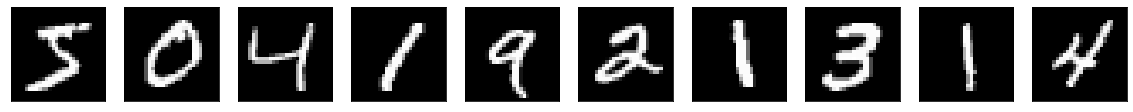

In [62]:
## loading MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## resizing images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

## OHE
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

display(x_train, 10, 1)
print([np.argmax(i) for i in y_train[:10]])

In [63]:
shape_in = x_train[0].shape
shape_out = y_train[0].shape[0]

print(shape_in)
print(shape_out)

(784,)
10


In [64]:
from keras.layers import Input, Dense
from keras.models import Model

input_image = Input(shape=(shape_in))
layer_1 = Dense(1024, activation='relu')(input_image)
layer_2 = Dense(1024, activation='relu')(layer_1)
output = Dense(shape_out, activation='sigmoid')(layer_2)

classifier = Model(input_image, output)

classifier.compile(loss='mean_squared_error', optimizer='sgd')

In [66]:
history = classifier.fit(x_train, y_train,
                         epochs=30,
                         batch_size=256,
                         shuffle=True,
                         validation_data=(x_test, y_test))

Epoch 1/30
235/235 [==============================] - 14s 60ms/step - loss: 0.0839 - val_loss: 0.0828
Epoch 2/30
235/235 [==============================] - 14s 60ms/step - loss: 0.0820 - val_loss: 0.0808
Epoch 3/30
235/235 [==============================] - 14s 60ms/step - loss: 0.0800 - val_loss: 0.0786
Epoch 4/30
235/235 [==============================] - 14s 59ms/step - loss: 0.0778 - val_loss: 0.0764
Epoch 5/30
235/235 [==============================] - 14s 59ms/step - loss: 0.0756 - val_loss: 0.0741
Epoch 6/30
235/235 [==============================] - 14s 59ms/step - loss: 0.0734 - val_loss: 0.0719
Epoch 7/30
235/235 [==============================] - 14s 60ms/step - loss: 0.0712 - val_loss: 0.0696
Epoch 8/30
235/235 [==============================] - 14s 60ms/step - loss: 0.0690 - val_loss: 0.0674
Epoch 9/30
235/235 [==============================] - 14s 60ms/step - loss: 0.0669 - val_loss: 0.0653
Epoch 10/30
235/235 [==============================] - 14s 60ms/step - loss: 0.064

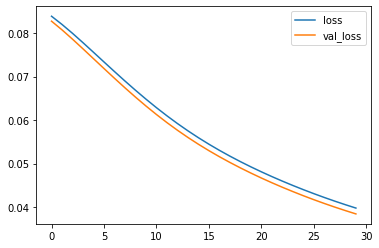

In [67]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "val_loss"])
plt.show()

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9]
[5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 1, 3, 6, 1, 7, 2, 8, 6, 7]


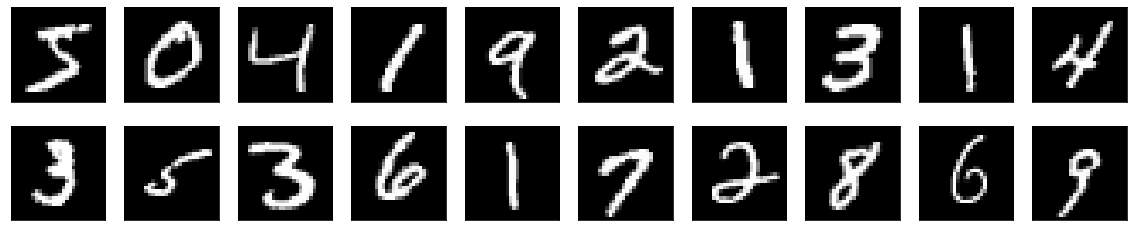

In [68]:
display(x_train, 20, 2)
print([np.argmax(i) for i in y_train[:20]])

preds = classifier.predict(x_train)
preds = [np.argmax(i) for i in preds][:20]
print(preds)